# Quantum Random Number Generator

In [ ]:
! pip install qiskit

In [66]:
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit.tools.monitor import job_monitor
import math

## Defining the superposition circuit

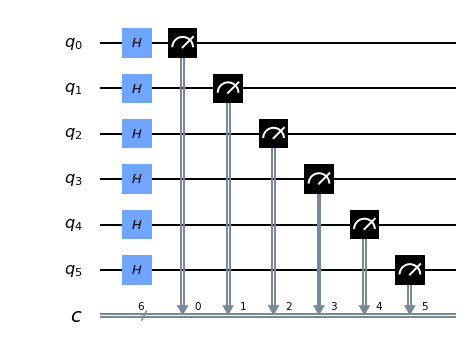

In [67]:
def superpose(n):
    circuit = QuantumCircuit(n,n)
    for i in range(0,n):
        circuit.h(i)
    circuit.measure(range(n),range(n))
    return circuit

sample = superpose(6)
sample.draw('mpl')

## Simulating the quantum random number generator locally

In [68]:
def qrandom_sim(a,b):
    n = math.ceil(math.log2(b))
    circuit = superpose(n)
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit,backend = simulator, shots = 1).result()
    v = int(list(result.get_counts(circuit).keys())[0],2)
    return v%(b-a+1)+a

In [69]:
r = qrandom_sim(2,20)
print(r)

14


## Running the random number generator on IBM's quantum computer
First load your IBMQ account, then run the cells below.

In [ ]:
IBMQ.load_account()

In [70]:
def qrandom(a,b):
    n = math.ceil(math.log2(b))
    circuit = superpose(n)
    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend('ibmq_16_melbourne')
    job = execute(circuit,backend = qcomp,shots = 1)
    job_monitor(job)
    result = job.result()
    v = int(list(result.get_counts(circuit).keys())[0],2)
    return v%(b-a+1)+a

In [71]:
r = qrandom(20,40)
print(r)

ibmqfactory.load_account:WARNING:2020-08-05 17:13:34,799: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
32
